In [53]:
import pandas as pd

# Загрузка датасета
file_path = 'data/lab3/heart.csv'
data = pd.read_csv(file_path)

# Показ первых строк и информации о датасете
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0   63    1   3     145   233    1        0       150     0      2.3    0   
 1   37    1   2     130   250    0        1       187     0      3.5    0   
 2   41    0   1     130   204    0        0       172     0      1.4    2   
 3   56    1   1     120   236    0        1       178     0      0.8    2   
 4   57    0   0     120   354    0        1       163     1      0.6    2   
 
    caa  thall  output  
 0    0      1       1  
 1    0      2       1  
 2    0      2       1  
 3    0      2       1  
 4    0      2       1  )

##### В датасете нет пропущенных значений, все значения переведы в числовой формат. Будет удобно работать.

О данном наборе данных:
- **Age** : Возраст пациента

- **Sex** : Пол пациента

- **exang**: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)

- **caa**: количество крупных сосудов (0-3)

- **cp** : тип боли в груди

  - Значение 1: типичная стенокардия
  - Значение 2: атипичная стенокардия
  - Значение 3: неангинальная боль
  - Значение 4: бессимптомная

- **trtbps** : артериальное давление в состоянии покоя (в мм рт. ст.)

- **chol** : уровень холестерина в мг/дл, измеренный с помощью сенсора ИМТ

- **fbs** : уровень сахара натощак > 120 мг/дл (1 = правда; 0 = ложь)

- **rest_ecg** : результаты электрокардиограммы в состоянии покоя

  - Значение 0: нормальный
  - Значение 1: аномалии волны ST-T (инверсии волны T и/или повышение или депрессия ST более чем на 0,05 мВ)
  - Значение 2: признаки вероятной или определенной гипертрофии левого желудочка по критериям Эстеса

- **thalach** : максимальная достигнутая частота сердечных сокращений

- **target** : 0 = меньшая вероятность сердечного приступа, 1 = большая вероятность сердечного приступа

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['output'])
y = data['output']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Оценка точности на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'{accuracy = :.2%}')

accuracy = 82.42%


##### Запомним точность модели: 82.42%

### Анализ результатов Feature Importance и Permutation Importance

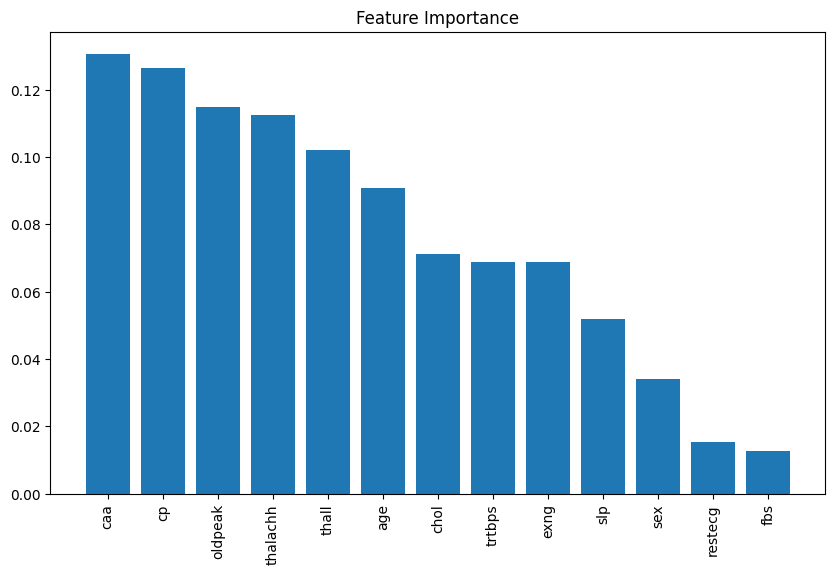

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Feature Importance график
feature_importances = model.feature_importances_
features = X.columns

# Построение графика
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(len(features)), feature_importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.title('Feature Importance')
plt.show()

1. **Feature Importance**:
   - Этот график показывает, какие признаки модель считает важными для предсказания вероятности сердечного приступа. Наибольший вклад внесли признаки:
     - **caa (число крупных сосудов)** — большее количество крупных сосудов с красками на ангиограмме коррелирует с увеличением риска сердечного приступа.
     - **cp (тип боли в груди)** — модель учитывает тип боли, и тип боли может указывать на риски (например, типичная стенокардия).
     - **oldpeak (депрессия ST)** и **thalach (максимальная частота сердечных сокращений)** — эти параметры также имеют высокий вклад, поскольку они характеризуют физическое состояние сердца при нагрузке.

   Эти признаки важны для модели, поскольку они помогают снижать ошибку классификации при разбиении данных. Чем выше значение feature importance, тем чаще и эффективнее признак использовался при построении дерева решений.

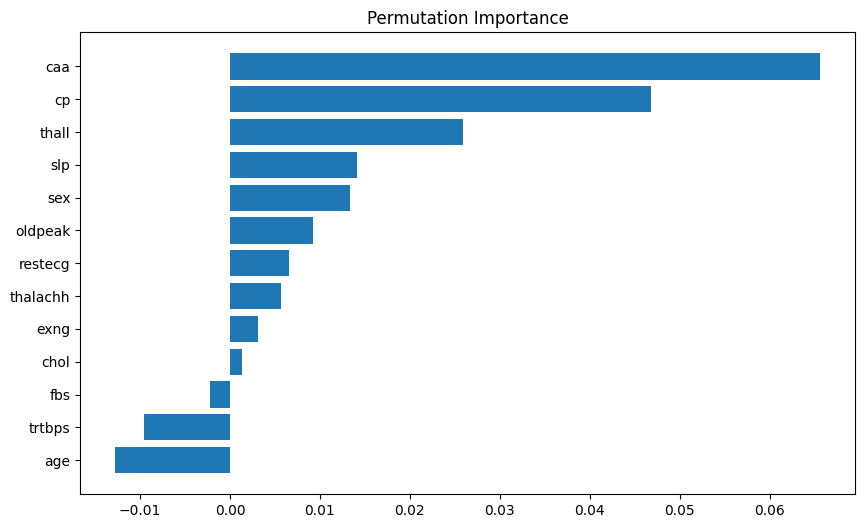

In [39]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title("Permutation Importance")
plt.show()

2. **Permutation Importance**:
   - Здесь тоже **caa** и **cp** имеют самый высокий вклад, что подтверждает их значимость для предсказаний. Однако некоторые признаки имеют низкую **permutation importance**, например:
     - **chol (уровень холестерина)** и **fbs (уровень сахара в крови)** — несмотря на их теоретическую связь с сердечными заболеваниями, их влияние на итоговое предсказание было незначительным.
   - Этот метод также выявляет различия в важности некоторых признаков, например, **oldpeak** здесь менее значим, чем в **feature importance**, что может говорить о переоценке его влияния в модели или возможной корреляции с другими признаками.

### Выводы:
Обе метрики согласны, что **caa** и **cp** — ключевые признаки для модели. **Permutation Importance** может давать более объективное представление, так как оценивает влияние каждого признака на результат модели, а не на её структуру, как в случае с **feature importance**.

In [58]:
import shap

explainer = shap.TreeExplainer(model)
observation = X.iloc[[0]]  # например, первая строка
shap_values = explainer.shap_values(observation)
shap.initjs()
class_index = 0  # Или 1
shap.force_plot(explainer.expected_value[class_index], shap_values[0, :, class_index], observation)

Чтобы получить полный результат, стоит скопировать js вывод и оценить его самому:

```
 <script>
   if (window.SHAP) SHAP.ReactDom.render(
    SHAP.React.createElement(SHAP.AdditiveForceVisualizer, {"outNames": ["f(x)"], "baseValue": 0.45745283018867955, "outValue": 0.16000000000000042, "link": "identity", "featureNames": ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"], 
    "features":{
     "0": {"effect": 0.006287270609028256, "value": 63.0}, 
     "1": {"effect": 0.02213120058171727, "value": 1.0}, 
     "2": {"effect": -0.07529978838641074, "value": 3.0}, 
     "3": {"effect": -0.025601082468218746, "value": 145.0}, 
     "4": {"effect": -0.025337096498949437, "value": 233.0}, 
     "5": {"effect": -0.020406733126760345, "value": 1.0}, 
     "6": {"effect": -0.002934834062586843, "value": 0.0}, 
     "7": {"effect": -0.02726220702191164, "value": 150.0}, 
     "8": {"effect": -0.0535816413532817, "value": 0.0}, 
     "9": {"effect": 0.07577861219819722, "value": 2.3}, 
    "10": {"effect": 0.03156129338067118, "value": 0.0},
    "11": {"effect": -0.11521644154025051, "value": 0.0}, 
    "12": {"effect": -0.08757138249992309, "value": 1.0}}, "plot_cmap": "RdBu", "labelMargin": 20}),
    document.getElementById('iR82KI5J00KSA6U2L2TMY')
  );
</script>
```

В этом выводе SHAP `force_plot` показаны влияния (вклад) признаков на предсказание для конкретного наблюдения. Влияение на предсказанное значение:

1. **Возраст (age = 63)** — Внес положительный вклад `+0.006`. Это означает, что возраст данного пациента (63 года) немного увеличивает вероятность предсказания класса.

2. **Пол (sex = 1)** — Положительное влияние `+0.022`. Значение "1" указывает на мужчину, и это значение немного увеличивает вероятность класса.

3. **Тип боли в груди (cp = 3)** — Отрицательный вклад `-0.075`. Этот тип боли в груди (значение "3") снижает вероятность класса.

4. **Систолическое артериальное давление (trtbps = 145)** — Отрицательное влияние `-0.026`. Данное артериальное давление немного снижает вероятность класса.

5. **Холестерин (chol = 233)** — Небольшой отрицательный вклад `-0.025`. Значение холестерина снижает вероятность класса.

6. **Уровень сахара в крови натощак (fbs = 1)** — Отрицательное влияние `-0.020`. Значение "1" (высокий уровень сахара) снижает вероятность класса.

7. **Результаты ЭКГ (restecg = 0)** — Незначительное влияние `-0.003`. Отрицательный вклад, который не сильно влияет на предсказание.

8. **Максимальная частота сердцебиения (thalachh = 150)** — Отрицательное влияние `-0.027`. Значение 150 немного снижает вероятность класса.

9. **Наличие стенокардии при нагрузке (exng = 0)** — Отрицательный вклад `-0.054`. Отсутствие стенокардии также снижает вероятность класса.

10. **Снижение сегмента ST (oldpeak = 2.3)** — Положительный вклад `+0.076`. Увеличенное значение ST повышает вероятность класса.

11. **Склонение ST (slp = 0)** — Положительное влияние `+0.032`. Значение "0" для склона ST немного увеличивает вероятность класса.

12. **Количество крупных сосудов, окрашенных флюороскопией (caa = 0)** — Отрицательный вклад `-0.115`. Это значение значительно снижает вероятность класса.

13. **Thal (thall = 1)** — Отрицательное влияние `-0.088`. Это значение thall тоже снижает вероятность класса.

### Общий вывод:
Наибольший вклад внесли признаки `caa`, `thall`, и `cp`, которые снизили вероятность класса. Признак `oldpeak` оказался основным, который увеличил вероятность класса.

Так как оценивалось **отсутствие сердечного приступа**, то понятно, почему `f(x) = 0.16` и признаки `caa`, `thall`, и `cp` снижают вероятность данного класса.

In [70]:
data.groupby(by='output').mean()[['caa', 'cp', 'thall', 'oldpeak']]

,caa,cp,thall,oldpeak
output,,,,
0,1.166667,0.478261,2.543478,1.585507
1,0.363636,1.375758,2.121212,0.583030


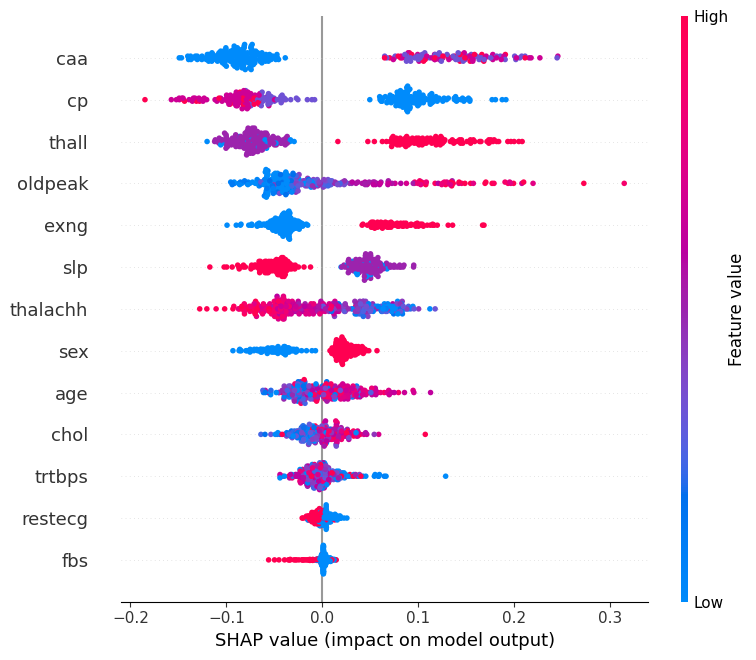

In [72]:
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values[:, :, 0], X)

Этот график представляет собой суммарный `SHAP`-график (summary plot), где показывается влияние каждого признака на предсказания модели.

1. **Ключевые признаки**:
   - **caa, cp, thall** и **oldpeak** оказывают наибольшее влияние на предсказания модели. Это видно по тому, что точки для этих признаков сильно разбросаны по оси `SHAP value`, что указывает на их высокое воздействие на результат.

2. **Влияние значений признаков**:
   - Высокие значения признаков (`красные точки`) и низкие (`синие точки`) имеют разное влияние на предсказание. Например:
     - **caa**: Более высокие значения этого признака имеют положительное влияние на предсказание (увеличивают вероятность отсутствия сердечного приступа), а более низкие — наличия.
     - **cp**: Высокие значения (`красные точки`) увеличивают вероятность наличия сердечного приступа, тогда как низкие (`синие точки`) имеют обратный эффект.

3. **Признаки с малым влиянием**:
   - Признаки **restecg (результаты ЭКГ)** и **fbs (уровень сахара)** имеют относительно небольшое влияние, так как их точки находятся близко к нулевым значениям `SHAP value`. Это значит, что модель не считает их значимыми для предсказаний.

### Общий вывод:
Наибольшее влияние на предсказания модели оказывают `caa`, `cp`, `thall`, и `oldpeak`.

### Дополнение

Попробую убрать фичи, которые дают отрицательное влияние по **permutation importance**

In [73]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['output', 'fbs', 'trtbps', 'age'])
y = data['output']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Оценка точности на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'{accuracy = :.2%}')

accuracy = 83.52%


Наверное, как я и ожидал, удаление фичей улучшило результаты модели. 82.42% -> 83.52%